In [30]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time
from numba import njit, prange

In [61]:
n = 50
N = n**2
a = np.zeros((N, N))
sigma = 0.05*np.pi

@njit(parallel=True)
def fun(a,i):
    for j in prange(i,N):
        p1 = np.array([i//n, i%n])
        p2 = np.array([j//n, j%n])
        d = np.sqrt(np.sum(np.square(p1 - p2)))
        val = np.exp(-d)/sigma
        a[i][j] = val
        a[j][i] = val

def fun_1(a):
    for i in prange(N):
        fun(a,i)
s = time.time()
fun_1(a)
e = time.time()
    
print(e - s)

1.6476778984069824


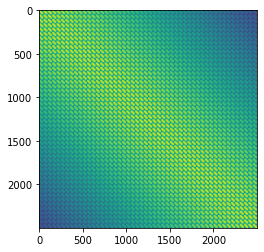

In [62]:
plt.imshow(np.log10(a))